In [24]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [39]:
#%matplotlib notebook
%matplotlib inline
#plt.style.use('classic')
#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn')

In [4]:
x = np.linspace(0,10,100)
print(x)

[  0.           0.1010101    0.2020202    0.3030303    0.4040404
   0.50505051   0.60606061   0.70707071   0.80808081   0.90909091
   1.01010101   1.11111111   1.21212121   1.31313131   1.41414141
   1.51515152   1.61616162   1.71717172   1.81818182   1.91919192
   2.02020202   2.12121212   2.22222222   2.32323232   2.42424242
   2.52525253   2.62626263   2.72727273   2.82828283   2.92929293
   3.03030303   3.13131313   3.23232323   3.33333333   3.43434343
   3.53535354   3.63636364   3.73737374   3.83838384   3.93939394
   4.04040404   4.14141414   4.24242424   4.34343434   4.44444444
   4.54545455   4.64646465   4.74747475   4.84848485   4.94949495
   5.05050505   5.15151515   5.25252525   5.35353535   5.45454545
   5.55555556   5.65656566   5.75757576   5.85858586   5.95959596
   6.06060606   6.16161616   6.26262626   6.36363636   6.46464646
   6.56565657   6.66666667   6.76767677   6.86868687   6.96969697
   7.07070707   7.17171717   7.27272727   7.37373737   7.47474747
   7.575757

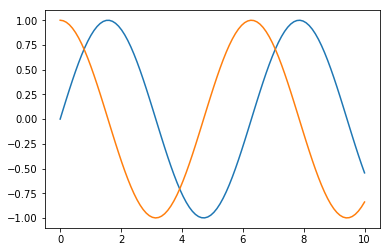

In [5]:
fig = plt.figure()
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))

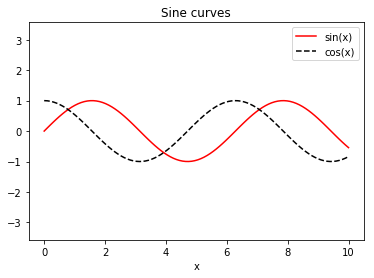

In [6]:
fig = plt.figure()
plt.plot(x,np.sin(x),linestyle='-',label='sin(x)',color='red')
plt.plot(x,np.cos(x),linestyle='--',label='cos(x)',color='black')
plt.xlabel('x')
plt.title('Sine curves')
plt.legend()
plt.axis('equal')
fig.savefig('sinecurves.png')


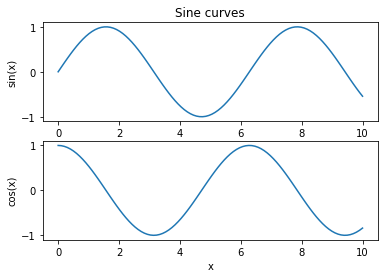

In [7]:
fig,ax = plt.subplots(2)
ax[0].plot(x,np.sin(x))
ax[1].plot(x,np.cos(x))
ax[0].set_ylabel('sin(x)')
ax[1].set_ylabel('cos(x)')
ax[0].set_title('Sine curves')
ax[1].set_xlabel('x')

In [9]:
bwght = pd.read_csv('BWGHT.CSV')

In [10]:
traffic = pd.read_csv('traffic2.csv')

In [11]:
traffic.head()

,year,totacc,fatacc,injacc,t,unem,spdlaw,beltlaw,wkends
0,1981,40511,365,15626,1,7.9,0,0,14
1,1981,36034,329,14469,2,8.0,0,0,12
2,1981,40328,369,16026,3,7.4,0,0,13
3,1981,37699,369,15560,4,7.2,0,0,12
4,1981,38816,355,16546,5,6.1,0,0,15


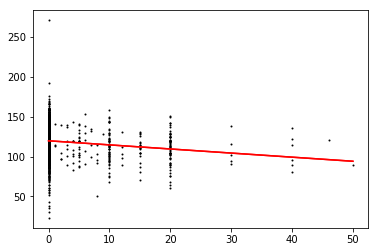

In [25]:
fig = plt.figure()
plt.scatter(bwght['cigs'],bwght['bwght'],s=1,marker='o',c='black')
model1 = smf.ols('bwght~cigs',data=bwght).fit()
x = np.linspace(0,50,100)
y = model1.predict(pd.DataFrame({'cigs':x}))
plt.plot(x,y,c="red")


model1 = smf.OLS(bwght['bwght'],sm.add_constant(bwght['cigs'])).fit()
x = np.linspace(0,50,100)
y = model1.predict(sm.add_constant(x))
plt.plot(x,y,c="red")

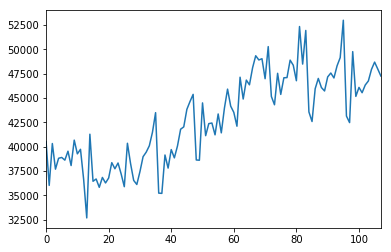

In [26]:
traffic['totacc'].plot()


Optimization terminated successfully.
         Current function value: 0.408616
         Iterations 6


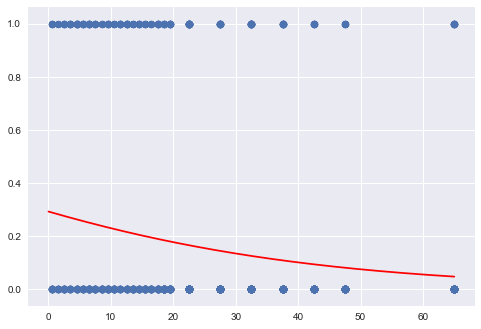

In [47]:
fig = plt.figure()
bwght['smokes'] = (bwght['cigs']>0).astype(int)
plt.scatter(bwght['faminc'],bwght['smokes'])
model2 = smf.logit('smokes~faminc',data=bwght).fit()
x = np.linspace(0,65,1000)
y = model2.predict(pd.DataFrame({'faminc':x}))
plt.plot(x,y,c="red")

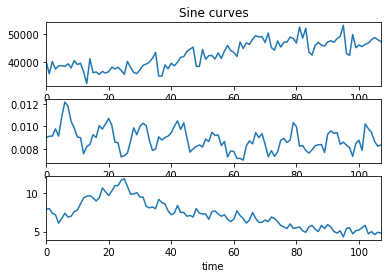

In [30]:
traffic['pfatal'] = traffic['fatacc']/traffic['totacc']
fig = plt.figure()
plt.subplot(3,1,1)
traffic['totacc'].plot()
plt.title('Time Series Plot')
plt.subplot(3,1,2)
traffic['pfatal'].plot()
plt.subplot(3,1,3)
traffic['unem'].plot()
plt.xlabel('time')

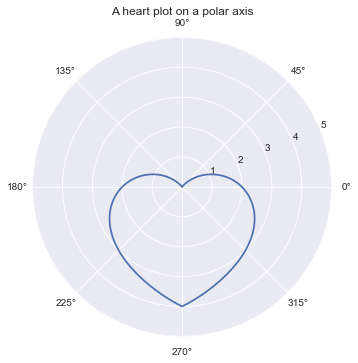

In [40]:
fig = plt.figure()
theta = np.linspace(0, 2*np.pi, 1000)
r = 3-2*np.sin(theta)+np.cos(2*theta)-2*np.abs(np.cos(theta))

ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
ax.set_rmax(5)
ax.set_rticks([1,2,3,4,5])  # less radial ticks
ax.grid(True)

ax.set_title("A heart plot on a polar axis", va='bottom')
plt.show()